#### CSE-221710313024-Kommera Shresta

## Project-Classify Real or Fake JobPosting

To predict the job posting is a real or fake posting using Machine Learning.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Data Loading

In [2]:
data = pd.read_csv("fake_job_postings.csv")
data

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


# Dimensions of data

In [3]:
print(data.shape)

(17880, 18)


In [4]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# Statistical summary of Data

In [5]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [7]:
data.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

### checking Null Values

In [8]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

### Droping Unnecessary Columns

In [9]:
#droping the unnecessary columns
data = data.drop(["job_id","salary_range"], axis=1)

In [10]:
data.head()

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


##### Mode Imputation

In [11]:
data['title'].fillna(data['title'].mode()[0],inplace=True)

In [12]:
data['location'].fillna(data['location'].mode()[0],inplace=True)

In [13]:
data['department'].fillna(data['department'].mode()[0],inplace=True)

In [14]:
data['company_profile'].fillna(data['company_profile'].mode()[0],inplace=True)

In [15]:
data['description'].fillna(data['description'].mode()[0],inplace=True)

In [16]:
data['requirements'].fillna(data['requirements'].mode()[0],inplace=True)

In [17]:
data['benefits'].fillna(data['benefits'].mode()[0],inplace=True)

In [18]:
data['telecommuting'].fillna(data['telecommuting'].mode()[0],inplace=True)

In [19]:
data['has_company_logo'].fillna(data['has_company_logo'].mode()[0],inplace=True)

In [20]:
data['has_questions'].fillna(data['has_questions'].mode()[0],inplace=True)

In [21]:
data['employment_type'].fillna(data['employment_type'].mode()[0],inplace=True)

In [22]:
data['required_experience'].fillna(data['required_experience'].mode()[0],inplace=True)

In [23]:
data['required_education'].fillna(data['required_education'].mode()[0],inplace=True)

In [24]:
data['industry'].fillna(data['industry'].mode()[0],inplace=True)

In [25]:
data['function'].fillna(data['function'].mode()[0],inplace=True)

In [26]:
data['fraudulent'].fillna(data['fraudulent'].mode()[0],inplace=True)

In [27]:
data.head()

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,See job description,0,1,0,Other,Internship,Bachelor's Degree,Information Technology and Services,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Sales,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,See job description,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",Sales,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Exploratory Data Analysis
## Data visualization

0    17014
1      866
Name: fraudulent, dtype: int64

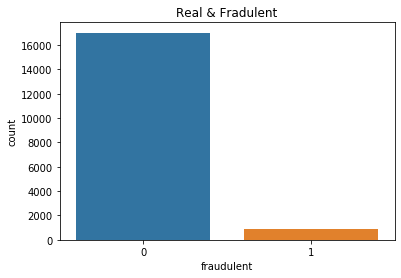

In [28]:
import seaborn as sns
sns.countplot(data.fraudulent).set_title('Real & Fradulent')
data['fraudulent'].value_counts()

Text(0.5, 0, 'required_education')

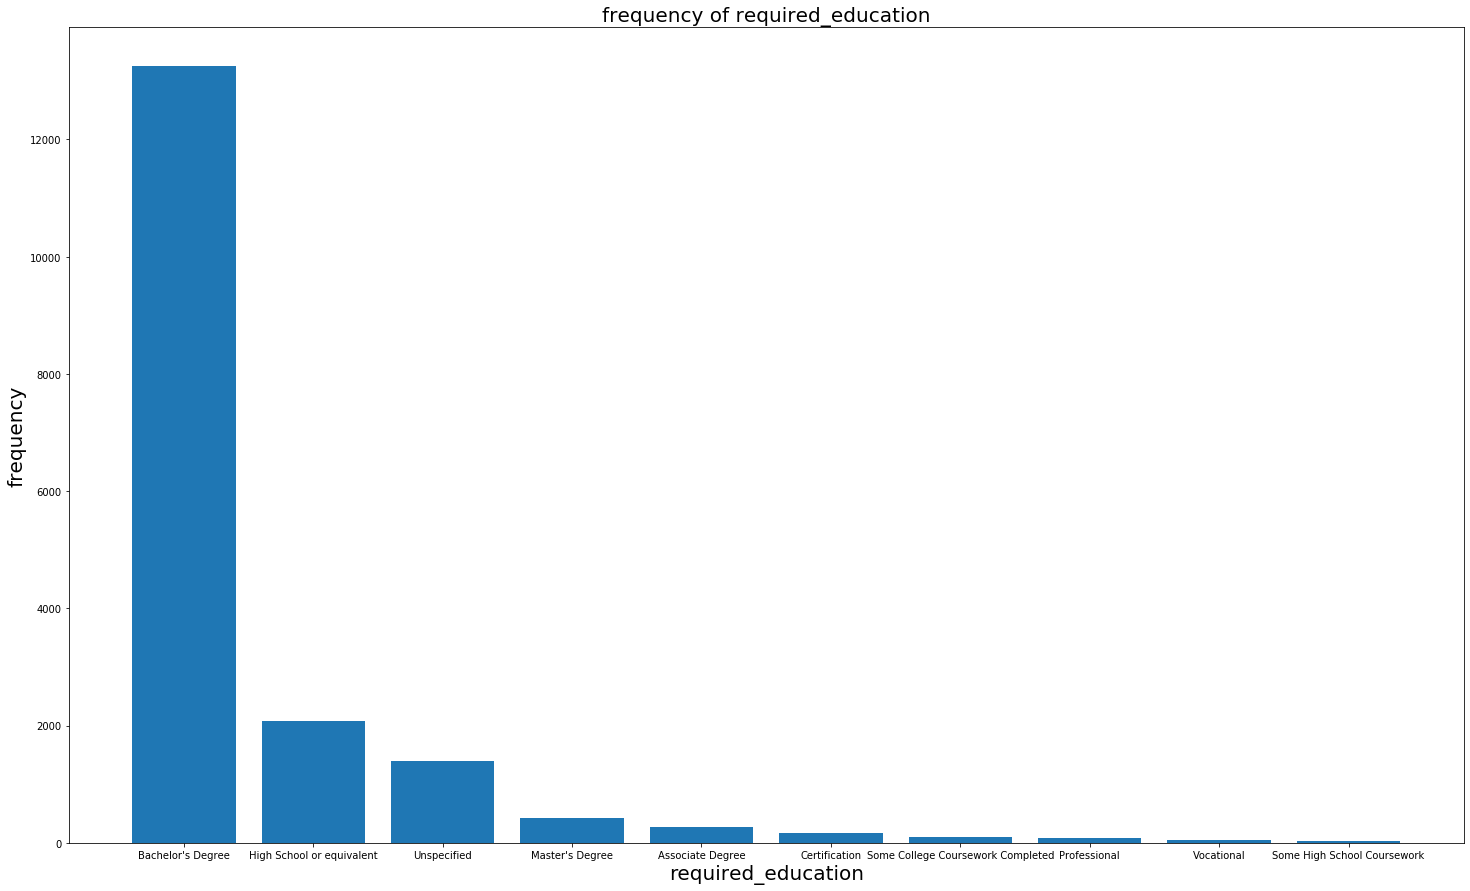

In [29]:
required_education  = dict(data.required_education.value_counts()[:10])
plt.figure(figsize=(25,15))
plt.title('frequency of required_education', size=20)
plt.bar(required_education.keys(), required_education.values())
plt.ylabel('frequency', size=20)
plt.xlabel('required_education', size=20)

Text(0.5, 0, 'employment_type')

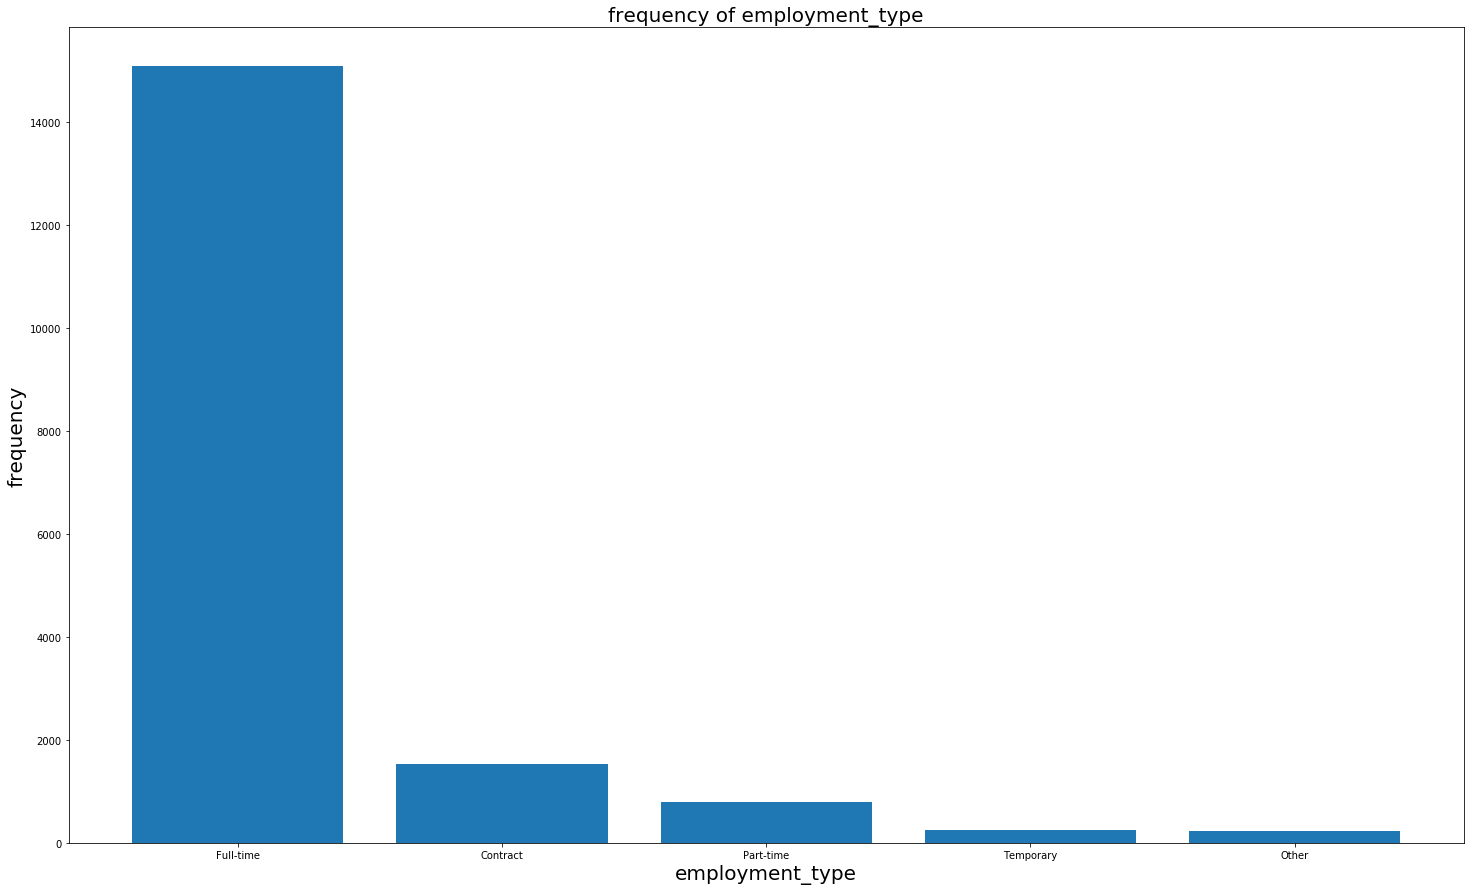

In [30]:
employment_type  = dict(data.employment_type.value_counts()[:11])
plt.figure(figsize=(25,15))
plt.title('frequency of employment_type', size=20)
plt.bar(employment_type.keys(), employment_type.values())
plt.ylabel('frequency', size=20)
plt.xlabel('employment_type', size=20)

Text(0.5, 0, 'required_experience')

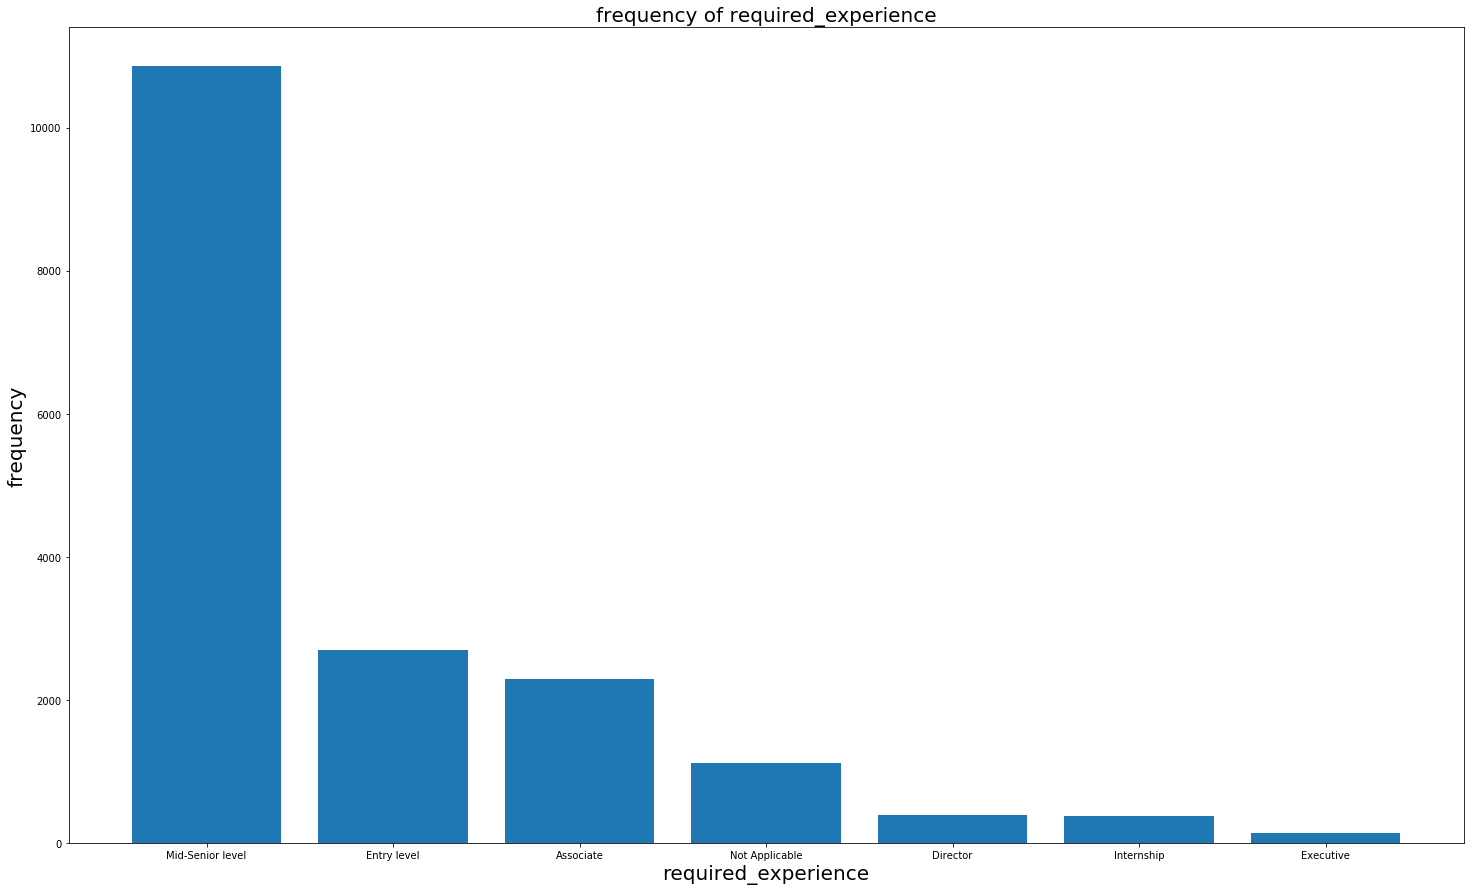

In [31]:
required_experience  = dict(data.required_experience.value_counts()[:11])
plt.figure(figsize=(25,15))
plt.title('frequency of required_experience', size=20)
plt.bar(required_experience.keys(), required_experience .values())
plt.ylabel('frequency', size=20)
plt.xlabel('required_experience', size=20)

Text(0.5, 0, 'function')

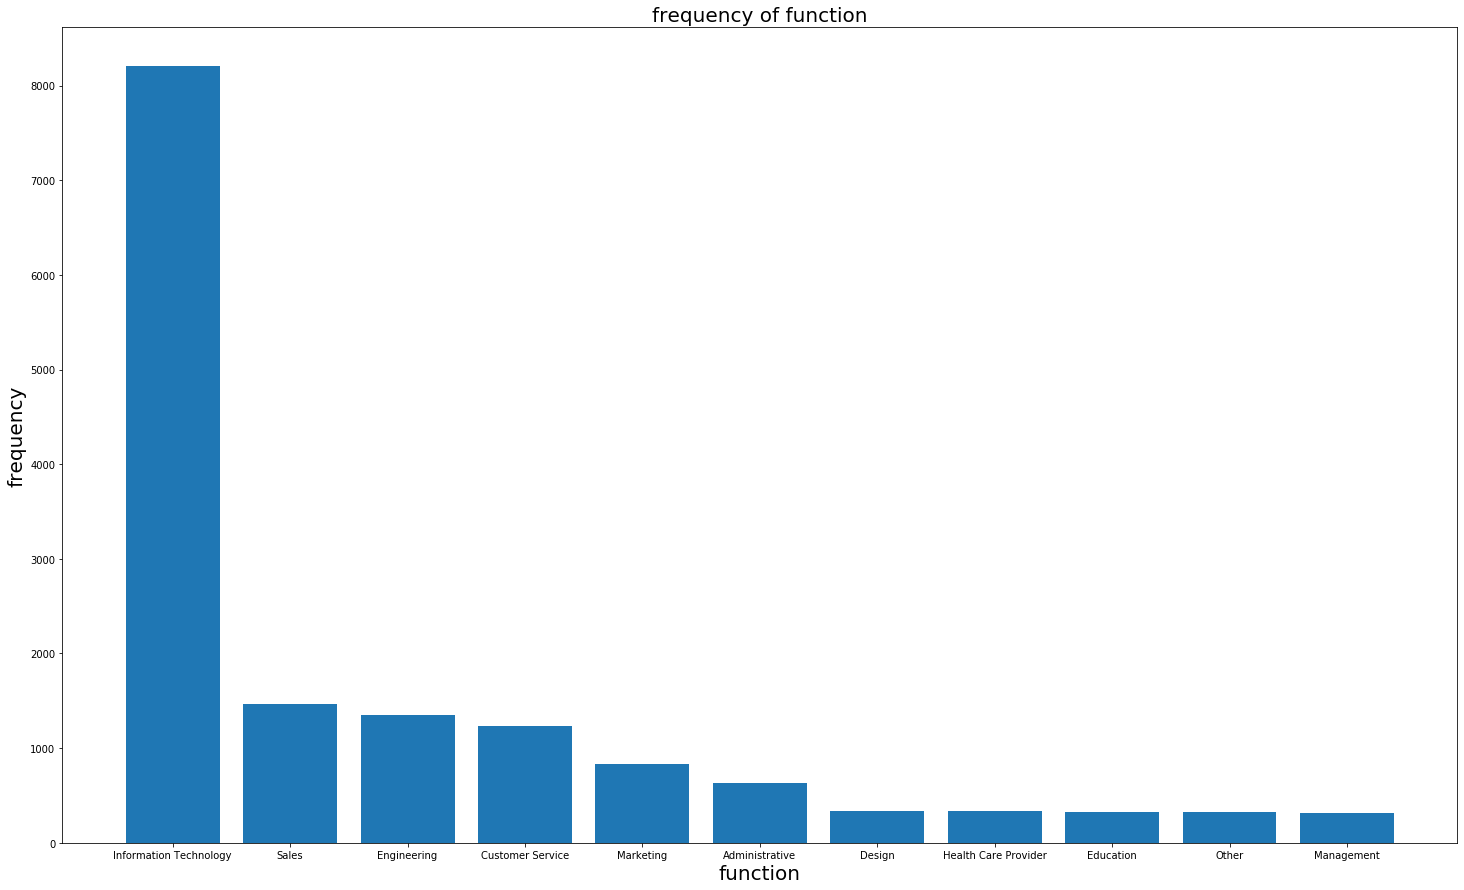

In [32]:
function = dict(data.function.value_counts()[:11])
plt.figure(figsize=(25,15))
plt.title('frequency of function', size=20)
plt.bar(function.keys(), function .values())
plt.ylabel('frequency', size=20)
plt.xlabel('function', size=20)

Text(0.5, 0, 'industry')

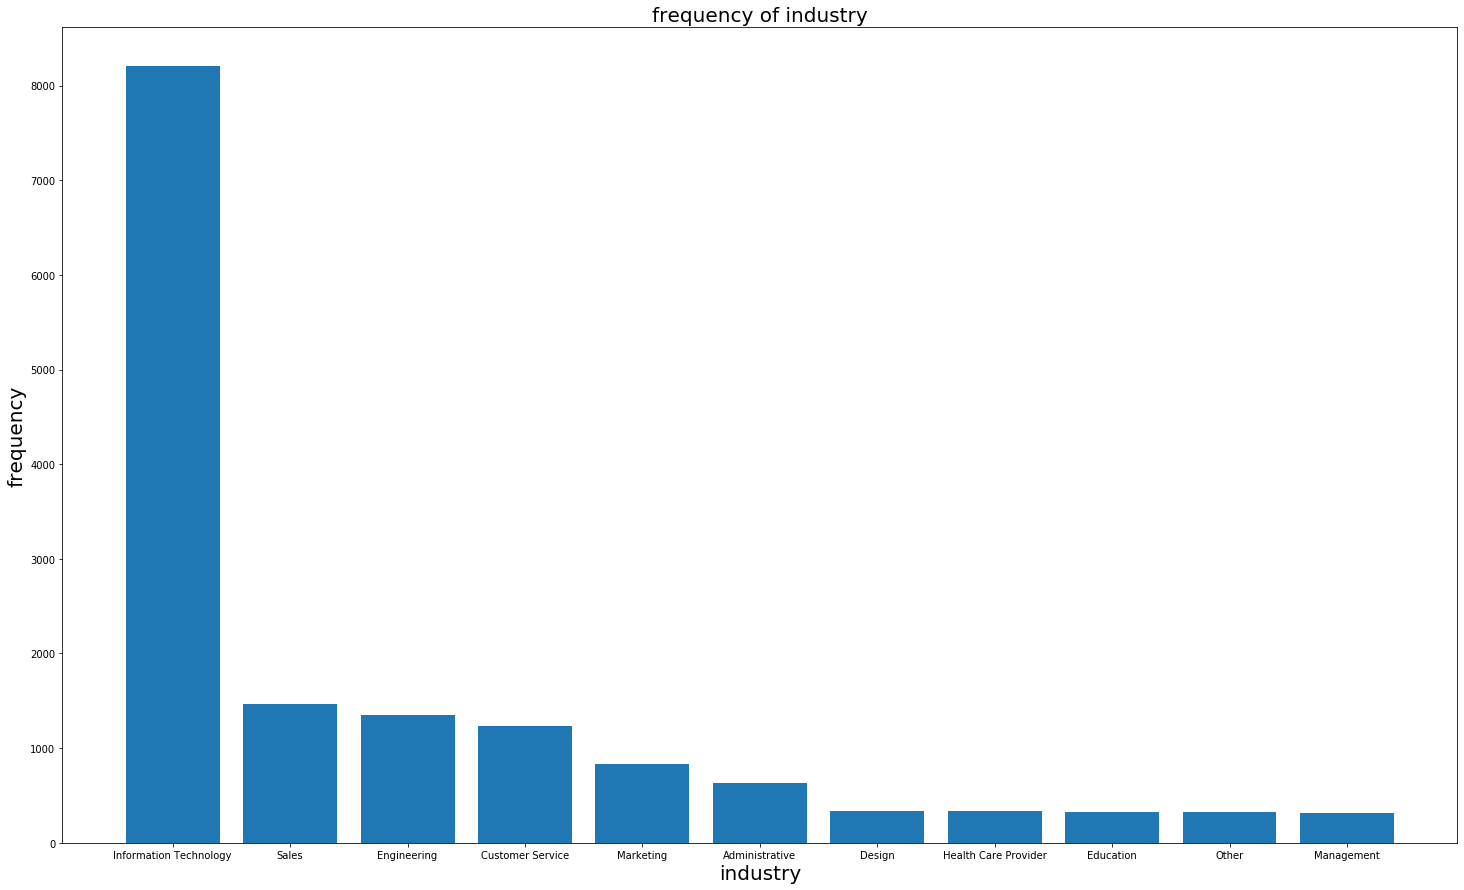

In [33]:
industry  = dict(data.industry.value_counts()[:11])
plt.figure(figsize=(25,15))
plt.title('frequency of industry', size=20)
plt.bar(function.keys(), function.values())
plt.ylabel('frequency', size=20)
plt.xlabel('industry', size=20)

0    9088
1    8792
Name: has_questions, dtype: int64

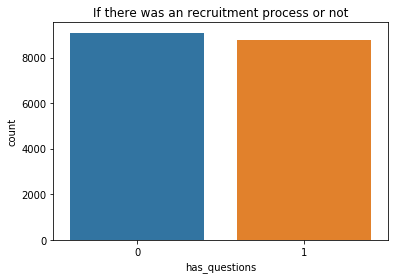

In [34]:
sns.countplot(data.has_questions).set_title('If there was an recruitment process or not')
data['has_questions'].value_counts()

0    17113
1      767
Name: telecommuting, dtype: int64

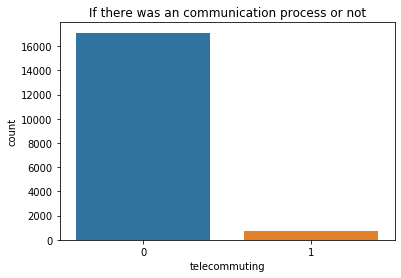

In [35]:
sns.countplot(data.telecommuting).set_title('If there was an communication process or not')
data['telecommuting'].value_counts()

1    14220
0     3660
Name: has_company_logo, dtype: int64

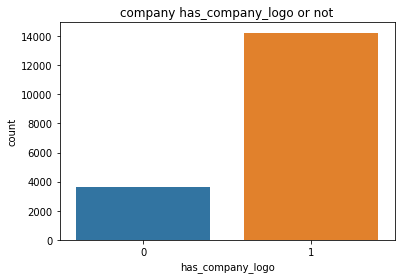

In [36]:
sns.countplot(data.has_company_logo).set_title('company has_company_logo or not')
data['has_company_logo'].value_counts()

##### Correlation

In [37]:
corelation = data.corr()

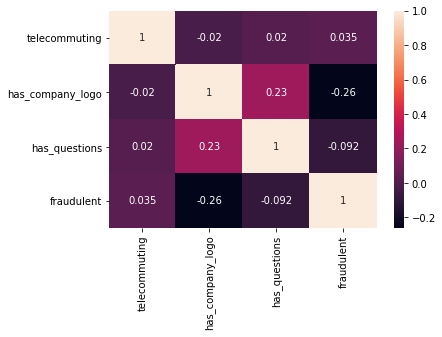

In [38]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

# Train_test_split

In [39]:
data.dtypes

title                  object
location               object
department             object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [40]:
data['function'] = data['title'] + data['location']  + data['department']  + data['company_profile'] + data['description']  + data['requirements']  + data['benefits'] + data['employment_type'] + data['required_education']  + data['industry']  + data['function'] 

In [41]:
X = data.function
y=data.fraudulent

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12516,)
(5364,)
(12516,)
(5364,)


### TFIDF Vectorizer

In [44]:
# TFIDF Vectorizer
# Import TfIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize and object for the TFIDF Vectorizer
tfidf = TfidfVectorizer()

In [45]:
# apply the tfidf to the data(x_train)
X_train_transformed = tfidf.fit_transform(X_train)
X_train_transformed

<12516x99810 sparse matrix of type '<class 'numpy.float64'>'
	with 2757864 stored elements in Compressed Sparse Row format>

In [46]:
X_test_transformed = tfidf.transform(X_test)
X_test_transformed

<5364x99810 sparse matrix of type '<class 'numpy.float64'>'
	with 1159764 stored elements in Compressed Sparse Row format>

In [47]:
# Feature Names
tfidf.get_feature_names()

['00',
 '000',
 '0000',
 '0001pt',
 '0005',
 '000a',
 '000aed',
 '000applying',
 '000benefits',
 '000bonus',
 '000cash',
 '000commission',
 '000company',
 '000equity',
 '000full',
 '000gbp',
 '000generate',
 '000health',
 '000highly',
 '000hours',
 '000how',
 '000if',
 '000incentivised',
 '000kuniversity',
 '000location',
 '000medical',
 '000overview',
 '000position',
 '000responsibilitiesyou',
 '000retailer',
 '000rn',
 '000see',
 '000skill',
 '000term',
 '000type',
 '000uncapped',
 '000university',
 '000victor',
 '000we',
 '000working',
 '001',
 '001ba',
 '003',
 '005',
 '00592duration',
 '006',
 '0062834see',
 '0062953full',
 '008',
 '00a',
 '00am',
 '00benefits',
 '00commission',
 '00pay',
 '00pdental',
 '00please',
 '00pm',
 '00pmcomfortable',
 '00pmeducation',
 '00pmfriday',
 '00pmjoin',
 '00pmmust',
 '00pmoverall',
 '00pmsaturday',
 '00pmstarting',
 '00pmtechnical',
 '00pmthursday',
 '00pmwednesday',
 '00pmwhere',
 '00pmyour',
 '00ppay',
 '00salary',
 '00saturdays',
 '00start',


In [48]:
# position of the words in the sparse matrix
tfidf.vocabulary_

{'caregiver': 13699,
 'hha': 39546,
 'cna': 16385,
 'watervliet': 94522,
 'hartfordus': 38977,
 'mi': 53027,
 'watervlietsales': 94523,
 'our': 59471,
 'mission': 53540,
 'to': 88189,
 'clients': 15926,
 'is': 44441,
 'preserve': 65588,
 'their': 87067,
 'independence': 41945,
 'enhance': 29842,
 'quality': 69092,
 'of': 57172,
 'life': 48105,
 'promote': 67961,
 'health': 39208,
 'amp': 4841,
 'wellbeing': 95047,
 'and': 5209,
 'have': 39032,
 'them': 87076,
 'consider': 18670,
 'us': 92432,
 'part': 60478,
 'family': 33756,
 'home': 39953,
 'sweet': 84117,
 'in': 41692,
 'care': 13640,
 'one': 57787,
 'the': 87036,
 'fastest': 33884,
 'growing': 38196,
 'agencies': 3995,
 'southwest': 80514,
 'michigan': 53053,
 'constant': 18765,
 'growth': 38223,
 'attributed': 8320,
 'excellent': 32052,
 'client': 15876,
 'employee': 29004,
 'service': 77169,
 'join': 45434,
 'team': 85346,
 'you': 96993,
 'will': 95377,
 'be': 9918,
 'treated': 89413,
 'as': 7166,
 'valued': 93012,
 'not': 56487,

In [49]:
tfidf.idf_

array([4.67910079, 3.45383726, 9.74169582, ..., 9.74169582, 9.04854864,
       9.74169582])

# Logistic Regression

In [50]:
## Import Logistic Regression
from sklearn.linear_model import LogisticRegression
# creating an object for Logistic Regression
Lr=LogisticRegression()

In [51]:
Lr.fit(X_train_transformed, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
y_train_pred = Lr.predict(X_train_transformed)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
# compare the actual values(y_train) with predicted values(y_train_pred)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_train,y_train_pred)

array([[11905,     0],
       [  357,   254]], dtype=int64)

In [54]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     11905
           1       1.00      0.42      0.59       611

    accuracy                           0.97     12516
   macro avg       0.99      0.71      0.79     12516
weighted avg       0.97      0.97      0.97     12516



In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.9714765100671141

In [56]:
Lr.fit(X_test_transformed, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_test_pred = Lr.predict(X_test_transformed)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
# compare the actual values(y_test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_test_pred)

array([[5109,    0],
       [ 189,   66]], dtype=int64)

In [59]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5109
           1       1.00      0.26      0.41       255

    accuracy                           0.96      5364
   macro avg       0.98      0.63      0.70      5364
weighted avg       0.97      0.96      0.95      5364



In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.964765100671141

In [61]:
Lr_score = (accuracy_score(y_test,y_test_pred))*100
Lr_score

96.47651006711409

In [62]:
from sklearn.metrics import precision_score
precision_score(y_test, y_test_pred)

1.0

# Naive Bayes 

In [63]:
# Apply the naive Bayes Algorithm
# Import BernNB
from sklearn.naive_bayes import BernoulliNB
# creating an object for BerNB
model_BernNB = BernoulliNB()

In [64]:
# Applying the algorithm to the data
# objectName.fit(Input,Output)
model_BernNB.fit(X_train_transformed, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [65]:
y_train_pred = model_BernNB.predict(X_train_transformed)

In [66]:
# compare the actual values(y_test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_train,y_train_pred)

array([[11853,    52],
       [  502,   109]], dtype=int64)

In [67]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     11905
           1       0.68      0.18      0.28       611

    accuracy                           0.96     12516
   macro avg       0.82      0.59      0.63     12516
weighted avg       0.95      0.96      0.94     12516



In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.955736657078939

In [69]:
# Applying the algorithm to the data
# objectName.fit(Input,Output)
model_BernNB.fit(X_test_transformed, y_test)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [70]:
y_test_pred = model_BernNB.predict(X_test_transformed)

In [71]:
# compare the actual values(y_test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_test_pred)

array([[5108,    1],
       [ 253,    2]], dtype=int64)

In [72]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      5109
           1       0.67      0.01      0.02       255

    accuracy                           0.95      5364
   macro avg       0.81      0.50      0.50      5364
weighted avg       0.94      0.95      0.93      5364



In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.9526472781506339

In [74]:
naive_score = (accuracy_score(y_test,y_test_pred))*100
naive_score

95.2647278150634

Text(0, 0.5, 'Accuracy')

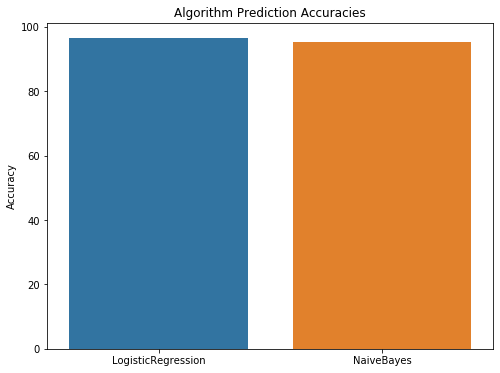

In [75]:
Methods = ['LogisticRegression', 'NaiveBayes']
Scores = np.array([Lr_score,naive_score])

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(Methods, Scores)
plt.title('Algorithm Prediction Accuracies')
plt.ylabel('Accuracy')

## GridSearchCV

In [76]:
from sklearn.model_selection import GridSearchCV
dual=[False]
max_iter=[100]
param_grid = dict(dual=dual,max_iter=max_iter)

In [77]:
#Import the GridSearchCV 
from sklearn.model_selection import GridSearchCV

# initialization of GridSearch with the parameters- ModelName and the dictionary of parameters
Lr = LogisticRegression(dual=False)
grid_search = GridSearchCV(estimator=Lr, param_grid=param_grid, cv = 3, n_jobs=-1)

# applying gridsearch onto dataset
grid_search.fit(X_train_transformed, y_train)
grid_result = grid_search.fit(X_train_transformed, y_train)

In [78]:
grid_result.best_params_

{'dual': False, 'max_iter': 100}

In [79]:
Lr = LogisticRegression(dual = False, max_iter = 100)

# We need to fit the model to the data
Lr.fit(X_train_transformed, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
# Prediction on test data
pred_test = Lr.predict(X_test_transformed)

#Classification Report of actual values and predicted value(GridSearch)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5109
           1       0.99      0.40      0.57       255

    accuracy                           0.97      5364
   macro avg       0.98      0.70      0.78      5364
weighted avg       0.97      0.97      0.97      5364



In [81]:
Lr_score = (Lr.score(X_test_transformed, pred_test))*100
Lr_score

100.0

Text(0, 0.5, 'Accuracy')

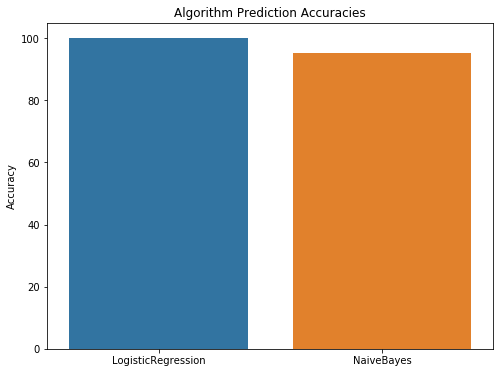

In [82]:
Methods = ['LogisticRegression', 'NaiveBayes']
Scores = np.array([Lr_score,naive_score])

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(Methods, Scores)
plt.title('Algorithm Prediction Accuracies')
plt.ylabel('Accuracy')